In [1]:
import cellrank as cr
import scvelo as scv

In [2]:
import scanpy as sc

In [3]:
adata_orig = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022_spliced_unspliced.h5ad")

In [3]:
adata = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022_spliced_unspliced.h5ad")

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 3871 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
scv.tl.recover_dynamics(adata, n_jobs=40)

recovering dynamics (using 40/96 cores)


  0%|          | 0/732 [00:00<?, ?gene/s]

/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarni

    finished (0:18:23) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [8]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)


computing velocities
    finished (0:00:11) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/96 cores)


  0%|          | 0/16918 [00:00<?, ?cells/s]

/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:39) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


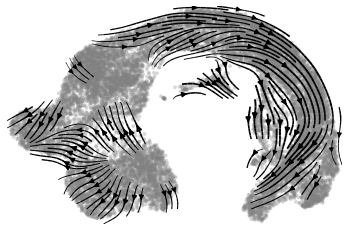

In [9]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)

In [11]:
adata_1 = adata[adata.obs["sample"]=="E14.5"].copy()
adata_2 = adata[adata.obs["sample"]=="E15.5"].copy()

In [14]:
scv.pp.filter_and_normalize(adata_1, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata_1)
sc.pp.neighbors(adata_1, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata_1, n_pcs=None, n_neighbors=None)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [15]:
scv.tl.recover_dynamics(adata_1, n_jobs=40)

recovering dynamics (using 40/96 cores)


  0%|          | 0/549 [00:00<?, ?gene/s]

/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarni

    finished (0:10:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


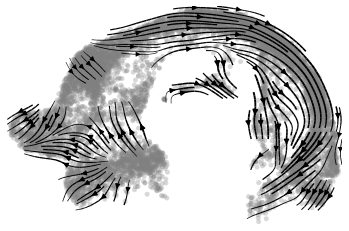

In [16]:
scv.pl.velocity_embedding_stream(
    adata_1, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4
)

In [17]:
scv.pp.filter_and_normalize(adata_2, min_shared_counts=20, n_top_genes=2000)
sc.tl.pca(adata_2)
sc.pp.neighbors(adata_2, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata_2, n_pcs=None, n_neighbors=None)

Filtered out 223 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [18]:
scv.tl.recover_dynamics(adata_2, n_jobs=40)

recovering dynamics (using 40/96 cores)


  0%|          | 0/546 [00:00<?, ?gene/s]

    finished (0:06:39) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


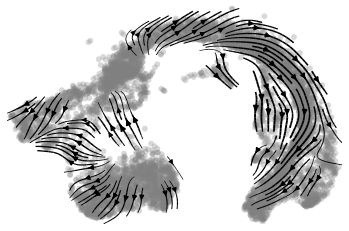

In [22]:
scv.pl.velocity_embedding_stream(
    adata_2, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4,
)

In [31]:
adata_orig = adata_orig[:, adata_orig.var.index.isin(adata.var.index)]

In [32]:
adata_orig.layers["velocity"] = adata.layers["velocity"].copy()
adata_orig.layers["velocity_u"] = adata.layers["velocity_u"].copy()
adata_orig.layers["Ms"] = adata.layers["Ms"].copy()
adata_orig.layers["Mu"] = adata.layers["Mu"].copy()

In [33]:
adata_orig.write("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022_velo.h5ad")

# Load data.

In [34]:
cr.tl.terminal_states(adata, cluster_key="celltype", weight_connectivities=0.2, n_states=5)

/tmp/ipykernel_96739/4101884203.py:1: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(adata, cluster_key="celltype", weight_connectivities=0.2)
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/16918 [00:00<?, ?cell/s]

  0%|          | 0/16918 [00:00<?, ?cell/s]

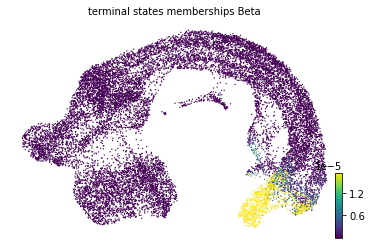

In [35]:
cr.pl.terminal_states(adata)

In [ ]:
cr.tl.initial_states(adata, cluster_key="clusters")
cr.pl.initial_states(adata, discrete=True)

/tmp/ipykernel_96739/1187097337.py:1: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata, cluster_key="clusters")
/home/icb/dominik.klein/miniconda3/envs/moscot-env2/lib/python3.9/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


  0%|          | 0/16918 [00:00<?, ?cell/s]

  0%|          | 0/16918 [00:00<?, ?cell/s]

In [ ]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)